# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dominic Naufal
- **Email:** dominic.naufal11@gmail.com
- **ID Dicoding:** dominic_naufal

## Menentukan Pertanyaan Bisnis

1. Produk apa yang paling laku berdasarkan kategorinya ?
2. Bagaimana persebaran pelanggan yang ada?
3. Bagaimana RFM Analysis nya?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
customers_df = pd.read_csv("./data/olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation_df = pd.read_csv("./data/olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items_df = pd.read_csv("./data/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments_df = pd.read_csv("./data/olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_df = pd.read_csv("./data/olist_order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_df = pd.read_csv("./data/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
products_df = pd.read_csv("./data/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df = pd.read_csv("./data/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
product_name_translation = pd.read_csv("./data/product_category_name_translation.csv")
product_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Pada customers dataset, terdapat 2 id yang mungkin digunakan sebagai foreign key di dataset yang lain, dan juga id yang dijadikan unique pada user. Namun saya rasa pada analisis data, unique_id tidak begitu diperlukan 

### Assessing Data

**CUSTOMER DATA**

In [13]:
customers_df.info()
customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Insight:**
- Pada data customers terlihat tidak terdapat tipe data yang salah ataupun missing value

In [14]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Customers data juga tidak terdapat duplikasi data

In [15]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Pada customer dataset ini juga tidak terdapat keanehan statistic descriptive yang perlu diselesaikan

**GEOLOCATION DATA**

In [16]:
geolocation_df.info()
geolocation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**Insight:**
- Pada geolocation dataset ini juga tidak terdapat tipe data yang salah ataupun missing value

In [17]:
print("Jumlah duplikasi data : ", geolocation_df.duplicated().sum())

Jumlah duplikasi data :  261831


**Insight:**
- Pada geolocation dataset terdapat 261831 duplicates data yang perlu di-cleaning

In [18]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


**Insight:**
- Pada geolocation dataset tidak terdapat keanehan berdasarkan statistic descriptive

**ORDER_ITEMS DATA**

In [19]:
order_items_df.info()
order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Insight:**
- Pada order_items dataset tidak terdapat missing value akan tetapi terdapat kesalah tipe data pada field shipping_limit_date yang seharusnya datetime bukan object

In [20]:
print("Jumlah duplikasi data : ", order_items_df.duplicated().sum())

Jumlah duplikasi data :  0


**Insight:**
- Pada order_items dataset tidak terdapat duplicated data

In [21]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


**Insight:**
- Pada order_items dataset tidak terdapat keanehan berdasarkan statistic descriptive

**ORDER_PAYMENTS DATA**

In [22]:
order_payments_df.info()
order_payments_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Insight:**
- Pada order_payments dataset tidak terdapat tipe data yang salah ataupun missing value

In [23]:
order_payments_df.duplicated().sum()

0

**Insight:**
- Pada order_payments dataset tidak terdapat duplicated data

In [24]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
- Pada order_payments dataset tidak terdapat keanehan berdasarkan statistic descriptive

**ORDER REVIEWS DATA**

In [25]:
order_reviews_df.info()
order_reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Insight:**
- Pada order_reviews dataset terdapat perbedaan angka yang menunjukkan adanya missing value pada field comment_title dan comment_message
- Terdapat kesalahan tipe data pada review_creation_date dan field review_answer_timestamp yang seharusnya datetime bukan object

In [26]:
order_reviews_df.duplicated().sum()

0

**Insight:**
- Pada order_reviews dataset tidak terdapat duplicated data

In [27]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


**Insight:**
- Pada order_reviews dataset tidak terdapat keanehan berdasarkan statistic descriptive

**ORDERS DATA**

In [28]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- Pada order dataset terdapat perbedaan angka yang menunjukkan adanya missing value pada field approved_at, delivered_customer_date, delivered_carrier_date 
- Pada ketiga field tersebut juga seharusnya memiliki tipe data datetime bukan object

In [29]:
orders_df.duplicated().sum()

0

**Insight:**
- Pada order dataset tidak terdapat duplicated data

In [30]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Pada order dataset tidak terdapat keanehan berdasarkan statistic desriptive

**PRODUCTS DATA**

In [31]:
products_df.info()
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight:**
- Pada products tidak terdapat tipe data yang salah namun hampir di semua field terdapat missing value sehingga perlu dilakukan cleaning

In [32]:
products_df.duplicated().sum()

0

**Insight:**
- Pada products tidak terdapat duplicated data

In [33]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Insight:**
- Pada products data tidak terdapat keanehan berdasarkan statistic descriptive

**SELLERS DATA**

In [34]:
sellers_df.info()
sellers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Insight:**
- Pada sllers data tidak terdapat kesalahan pada tipe data atau missing value

In [35]:
sellers_df.duplicated().sum()

0

**Insight:**
- Pada sellers data tidak terdapat duplicated data

In [36]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- Pada sellers data tidak terdapat keanehan berdasarkan statistic descriptive

In [37]:
product_name_translation.info()
product_name_translation.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

**Insight:**
- Pada products translation data tidak terdapat missing value atau kesalahan tipe data

In [38]:
product_name_translation.duplicated().sum()

0

**Insight:**
- Pada products translation data tidak terdapat duplicate data

In [39]:
product_name_translation.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Pada products translation data tidak terdapat keanehan pada statistic descriptive

### Cleaning Data

**GEOLOCATION**

In [40]:
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.duplicated().sum()

0

**Insight:**
- Menghilangkan atau drop duplicates value pada geolocation data

**ORDER ITEMS**

In [41]:
order_items_datetime = ["shipping_limit_date"]

for column in order_items_datetime:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Mengubah tipe data shippping_limit_date menjadi datetime

**ORDER REVIEWS**

**Missing Value**

In [42]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Karena kolom title memang banyak yang kosong dan tidak terlalu berpengaruh pada kualitas data, maka kolom tersebut bisa kita hapus

In [43]:
order_reviews_df.drop("review_comment_title", axis=1, inplace=True)
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_message   40977 non-null  object
 4   review_creation_date     99224 non-null  object
 5   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


In [44]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]
order_reviews_df["review_comment_message"].fillna("No Comment", inplace=True)
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Mengubah kolom message menjadi no_comment. Sehingga sudah tidak ada lagi missing value

**Ubah Tipe Data**

In [45]:
reviews_datetime = ["review_creation_date", "review_answer_timestamp"]

for column in reviews_datetime:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_message   99224 non-null  object        
 4   review_creation_date     99224 non-null  datetime64[ns]
 5   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 4.5+ MB


**ORDERS**

**Missing Value**

Jika kita lihat pada pertanyaan yang ada, kolom approved_at, delivered_carrier, dan delivered_customer tidak terlalu berpengaruh. Sehingga data yang memiliki missing value pada ketiga kolom tersebut dapat kita hapus.

In [46]:
orders_df = orders_df.dropna(subset=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


**Ubah Tipe Data**

In [47]:
orders_datetime = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in orders_datetime:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  object        
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.6+ MB


**PRODUCT**

Pada data product, sebagian besar kolom tidak kita perlukan. Sehingga kita bisa menghapus kolom tersebut dan menyisakan product_id dan category_name

In [48]:
products_df.drop(["product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm", "product_name_lenght", "product_description_lenght"], axis=1, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


Pada field name yang kosong bisa kita isi dengan value "other"

In [49]:
products_df["product_category_name"].fillna(value="other", inplace=True)
products_df.isna().sum()

product_id               0
product_category_name    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Customer & Orders

In [50]:
# customer by city
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

**Insight:**
Dataframe di atas digunakan untuk menampilkan kota yang memiliki Customer terbanyak.
Terlihat customer terbanyak berada pada kota sao paulo sebanyak 15540 customer

In [51]:
# Menggabungkan customers dengan orders
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [52]:
customers_orders_df.groupby("customer_id").agg({
    "order_id": "count",
    "customer_city": "first"
}).rename(columns={"order_id": "total_order"}).sort_values(by="total_order", ascending=False).head()

,total_order,customer_city
customer_id,,
00012a2ce6f8dcda20d059ce98491703,1,osasco
a5a61ea6f75db2b724b6bf45de19795c,1,sao paulo
a5ad05a5ebe3d0f1a76ef42df5296c45,1,fortaleza
a5accda9e28060c70a2607fd29ab4d59,1,osasco
a5acc83d0613fa082aee11996117121c,1,pojuca


**Insight:**
Setelah menggabungkan dataframe customers dan orders, kita dapat melihat customer dengan order terbanyak.
Terlihat pada dataframe di atas menampilkan customer dengan order terbanyak.

### Explore geolocation

In [53]:
# Meilhat ada berapa banyak zip code pada satu kota
geolocation_df.groupby("geolocation_city").geolocation_zip_code_prefix.count().sort_values(ascending=False)

geolocation_city
sao paulo         79927
rio de janeiro    35177
são paulo         19718
belo horizonte    19474
curitiba          11263
                  ...  
guardinha             1
guarulhos-sp          1
guassusse             1
guassussê             1
* cidade              1
Name: geolocation_zip_code_prefix, Length: 8011, dtype: int64

**Insight:**
Kota Sao paulo memiliki code prefix terbanyak

### Explore Order_Items & Sellers

In [54]:
items_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [55]:
items_sellers_df.groupby("seller_id").agg({
    "order_id": "count",
    "seller_city": "first"
}).rename(columns={"order_id": "total_order"}).sort_values(by="total_order", ascending=False)

,total_order,seller_city
seller_id,,
6560211a19b47992c3666cc44a7e94c0,2033,sao paulo
4a3ca9315b744ce9f8e9374361493884,1987,ibitinga
1f50f920176fa81dab994f9023523100,1931,sao jose do rio preto
cc419e0650a3c5ba77189a1882b7556a,1775,santo andre
da8622b14eb17ae2831f4ac5b9dab84a,1551,piracicaba
...,...,...
5f57db27027655e6c6a391601daa0258,1,viana
5e25c632f9db6cfb8bc100421c2737b6,1,chapeco
5e106d93b717c2682b9383da480364a1,1,santa terezinha de itaipu


**Insight:** Pada dataframe di atas menampilkan gabungan dari 2 dataset yaitu sellers dan order_items. Setelah itu menampilkan seller dengan order terbanyak beserta kota seller tersebut

### Explore Payments & Reviews

In [56]:
payments_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Comment,2017-12-21,2017-12-22 01:10:39


In [57]:
payments_reviews_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

**Insight:** Dataframe di atas menampilkan tipe pembayaran yang digunakan oleh customers. Terlihat pada dataframe di atas menampilkan transaksi yang dilakukan banyak yang menggunakan credit_card

### Explore Products & Translation

In [58]:
new_products_df = pd.merge(
    left=products_df,
    right=product_name_translation,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
new_products_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


### All Data

**Customers Orders & Items Sellers**

In [59]:
all_data = pd.merge(
    left=customers_orders_df,
    right=items_sellers_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940,ibitinga,SP


**All Data & Payments Reviews**

In [60]:
all_data = pd.merge(
    left=all_data,
    right=payments_reviews_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,SC,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,SP,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,SP,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,SP,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


**All Data & New Products**

In [61]:
all_data = pd.merge(
    left=all_data,
    right=new_products_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Comment,2017-05-26,2017-05-30 22:34:40,moveis_escritorio,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,2017-12-01 19:41:59,moveis_escritorio,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29,2017-12-01 19:41:59,moveis_escritorio,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,credit_card,7,140.61,251191809e37c1cffc16865947c18a4d,3.0,"Produto compatível com seu valor, muito bonito...",2017-05-27,2017-05-28 02:43:16,moveis_escritorio,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,credit_card,10,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,Entregou antes do prazo,2018-03-01,2018-03-02 11:11:24,moveis_escritorio,office_furniture


In [62]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115703 entries, 0 to 115702
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115703 non-null  object        
 1   customer_unique_id             115703 non-null  object        
 2   customer_zip_code_prefix       115703 non-null  int64         
 3   customer_city                  115703 non-null  object        
 4   customer_state                 115703 non-null  object        
 5   order_id                       115703 non-null  object        
 6   order_status                   115703 non-null  object        
 7   order_purchase_timestamp       115703 non-null  object        
 8   order_approved_at              115703 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115703 non-null  datetime64[ns]
 10  order_delivered_customer_date  115703 non-null  datetime64[ns]
 11  

In [63]:
# Melihat data jumlah min dan maks pembelian produk
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4092          1.0  5.0
toys                              3804          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

In [64]:
# Menampilkan total pembelian berdasarkan city
all_data.groupby(by="customer_city").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_city,,
sao paulo,15044,2784903.03
rio de janeiro,6603,1527266.52
belo horizonte,2697,492597.34
brasilia,2071,422748.14
curitiba,1489,324067.13
...,...,...
santo antonio do rio abaixo,1,24.23
tamboara,1,24.09
jenipapo de minas,1,22.58


In [65]:
all_data.duplicated().sum()

0

**CONVERT TO CSV**

In [66]:
all_data.to_csv("./dashboard/all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling laku berdasarkan kategorinya ?

In [67]:
best_sellers = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
best_sellers = best_sellers.rename(columns={
  "product_category_name_english": "product",
  "product_id": "total_product"
})
best_sellers = best_sellers.sort_values(by="total_product", ascending=False)
best_sellers.head()

,product,total_product
7,bed_bath_table,11813
43,health_beauty,9815
65,sports_leisure,8789
39,furniture_decor,8639
15,computers_accessories,7962


C:\Users\domin\AppData\Local\Temp\ipykernel_31600\1144227878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_product", y="product", data=best_sellers.head(5), palette=colors, ax=ax[0])
C:\Users\domin\AppData\Local\Temp\ipykernel_31600\1144227878.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_product", y="product", data=best_sellers.sort_values(by="total_product", ascending=True).head(5), palette=colors, ax=ax[1])


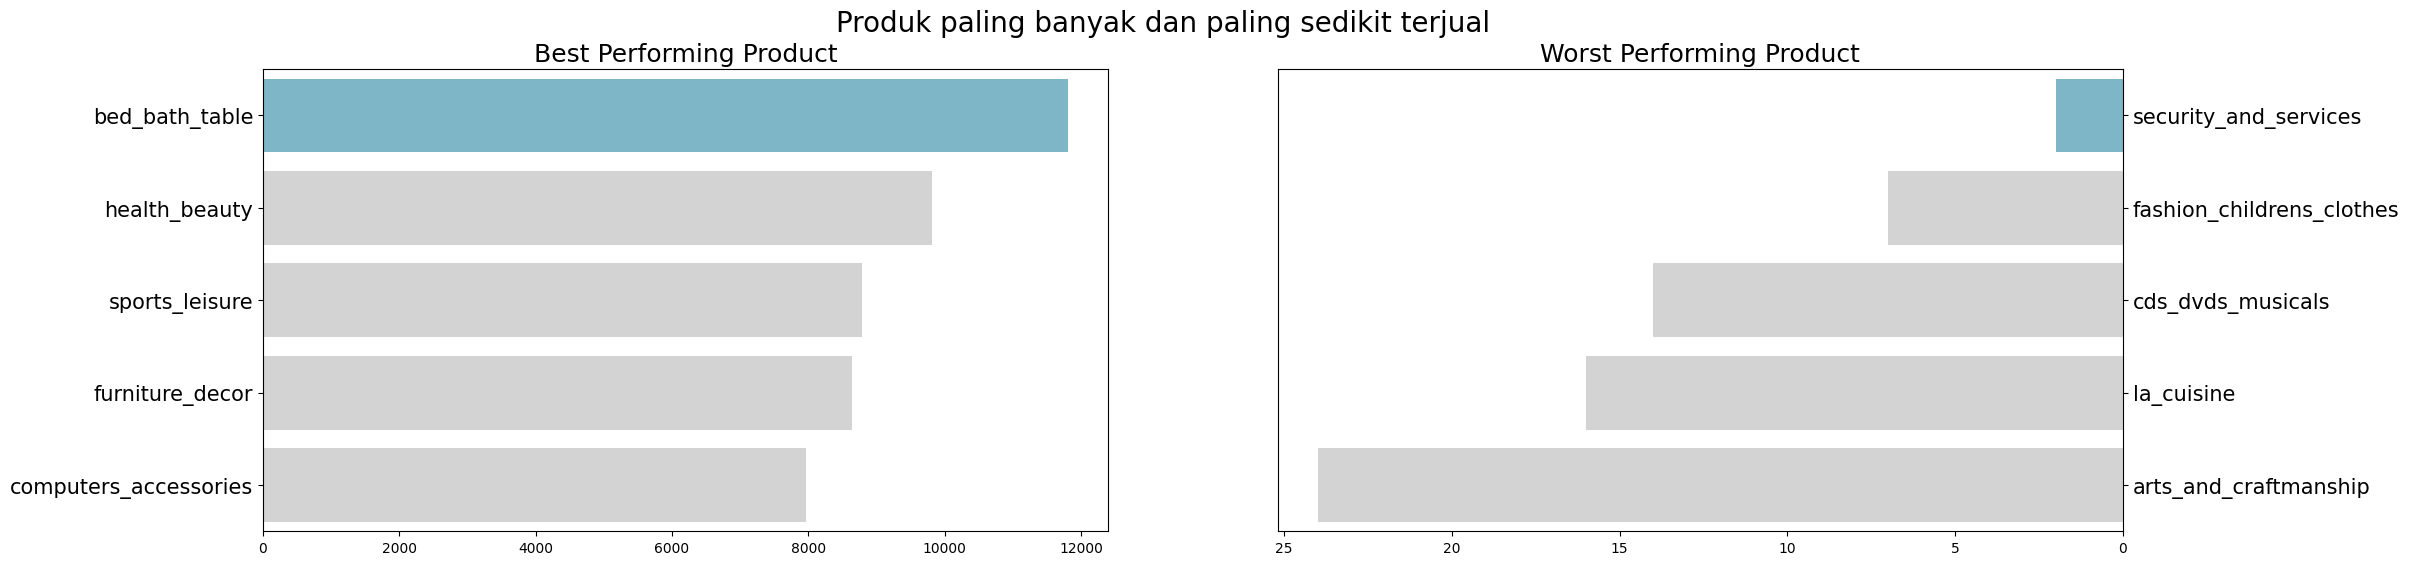

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_product", y="product", data=best_sellers.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="total_product", y="product", data=best_sellers.sort_values(by="total_product", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

**Insight:**
Pada grafik di atas terlihat bahwa produk dengan kategori peralatan rumah tangga menjadi produk yang paling laris diikuti dengan produk kecantikan. Dan produk dengan kategori keamanan dan pelayanan menjadi kategori yang paling sedikit peminat nya diikuti dengan produk pakaian anak

### Pertanyaan 2: Bagaimana persebaran pelanggan yang ada? Kota manakah yang memiliki paling banyak customer?

In [69]:
most_customer_by_city = all_data.groupby(by="customer_city").customer_id.nunique().reset_index()
most_customer_by_city.rename(columns={
    "customer_id": "total_customer"
}, inplace=True)
most_customer_by_city = most_customer_by_city.sort_values(by="total_customer", ascending=False)
most_customer_by_city.head()

,customer_city,total_customer
3563,sao paulo,15044
3126,rio de janeiro,6603
449,belo horizonte,2697
553,brasilia,2071
1135,curitiba,1489


C:\Users\domin\AppData\Local\Temp\ipykernel_31600\2489139961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_customer", y="customer_city", data=most_customer_by_city.head(10), palette="viridis")


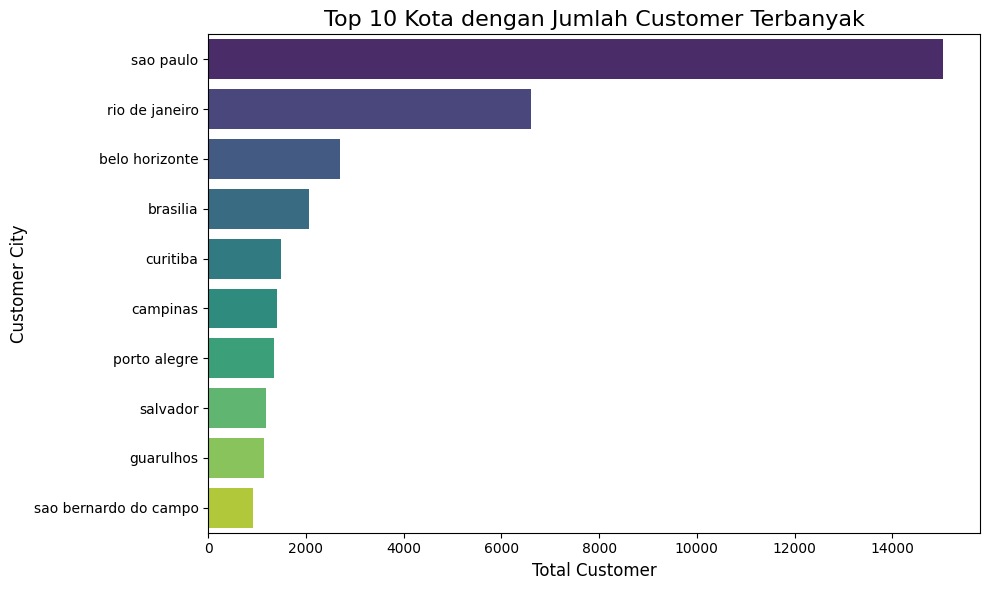

In [70]:
plt.figure(figsize=(10, 6))

sns.barplot(x="total_customer", y="customer_city", data=most_customer_by_city.head(10), palette="viridis")

plt.title("Top 10 Kota dengan Jumlah Customer Terbanyak", fontsize=16)
plt.xlabel("Total Customer", fontsize=12)
plt.ylabel("Customer City", fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**
Pada grafik di atas terlihat kota sao paulo menjadi kota yang paling banyak memiliki customer. Hal ini membuat kota sao paulo menjadi potensi pasar yang sangat unggul.

### Pertanyaan 3: Bagaimana RFM Analysis nya?

**Recency Analysis**

In [71]:
current_date = pd.Timestamp('2018-12-31')  # Hitung dari akhir tahun 2018 kebelakang

recency_df = all_data.groupby('customer_id').agg({
    'order_approved_at': 'max'
}).reset_index()

recency_df['recency'] = (current_date - recency_df['order_approved_at']).dt.days

# Hapus kolom 'order_approved_at' karena tidak diperlukan
recency_df.drop(columns='order_approved_at', inplace=True)
recency_df.sort_values(by="recency", ascending=False)

recency_df.head()

,customer_id,recency
0,00012a2ce6f8dcda20d059ce98491703,411
1,000161a058600d5901f007fab4c27140,532
2,0001fd6190edaaf884bcaf3d49edf079,670
3,0002414f95344307404f0ace7a26f1d5,500
4,000379cdec625522490c315e70c7a9fb,270


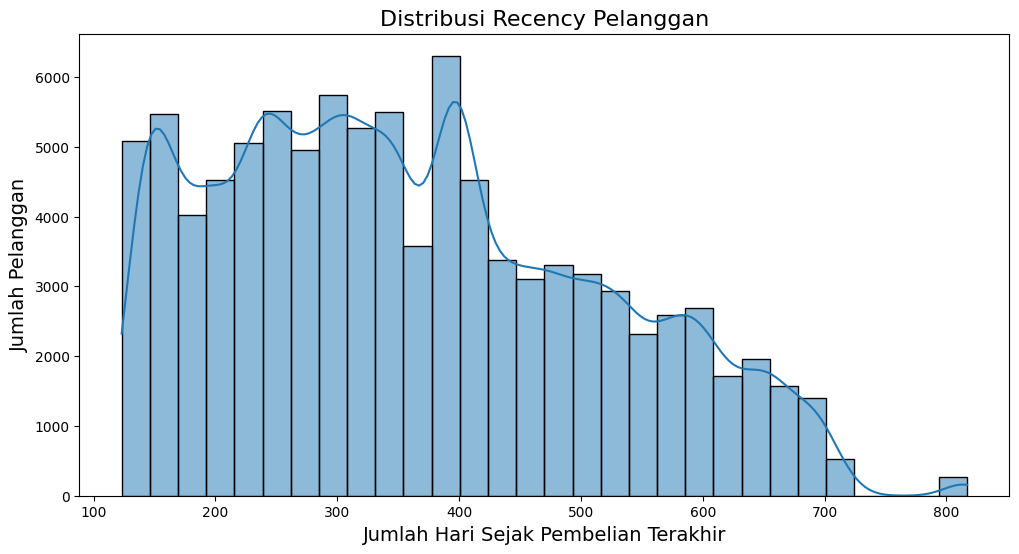

In [72]:
plt.figure(figsize=(12, 6))

sns.histplot(data=recency_df, x='recency', bins=30, kde=True)

plt.title('Distribusi Recency Pelanggan', fontsize=16)
plt.xlabel('Jumlah Hari Sejak Pembelian Terakhir', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)

plt.show()

In [73]:
end_date = all_data['order_approved_at'].max() 
start_date = end_date - pd.DateOffset(months=1) 
recent_orders = all_data[(all_data['order_approved_at'] >= start_date) & 
                          (all_data['order_approved_at'] <= end_date)]

frequency_df = recent_orders.groupby('customer_id').agg({
    'order_approved_at': 'count'
}).reset_index()

frequency_df.rename(columns={'order_approved_at': 'frequency'}, inplace=True)

top_frequency_df = frequency_df.sort_values(by='frequency', ascending=False).head()
top_frequency_df.head()

,customer_id,frequency
1834,42568702f6b7a0d94ad168a4b1dbe0eb,15
384,0d861a5e4dd6a9079d89e1330848f0ab,10
4788,ac062697fc30d35bd5bd10d4e71095e8,8
3996,90bd3163f91abddea340d03ca4eaf140,7
510,1205480caca6c37f55954da838933b8a,7


C:\Users\domin\AppData\Local\Temp\ipykernel_31600\995675185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequency_df.sort_values(by='frequency', ascending=False).head(20),


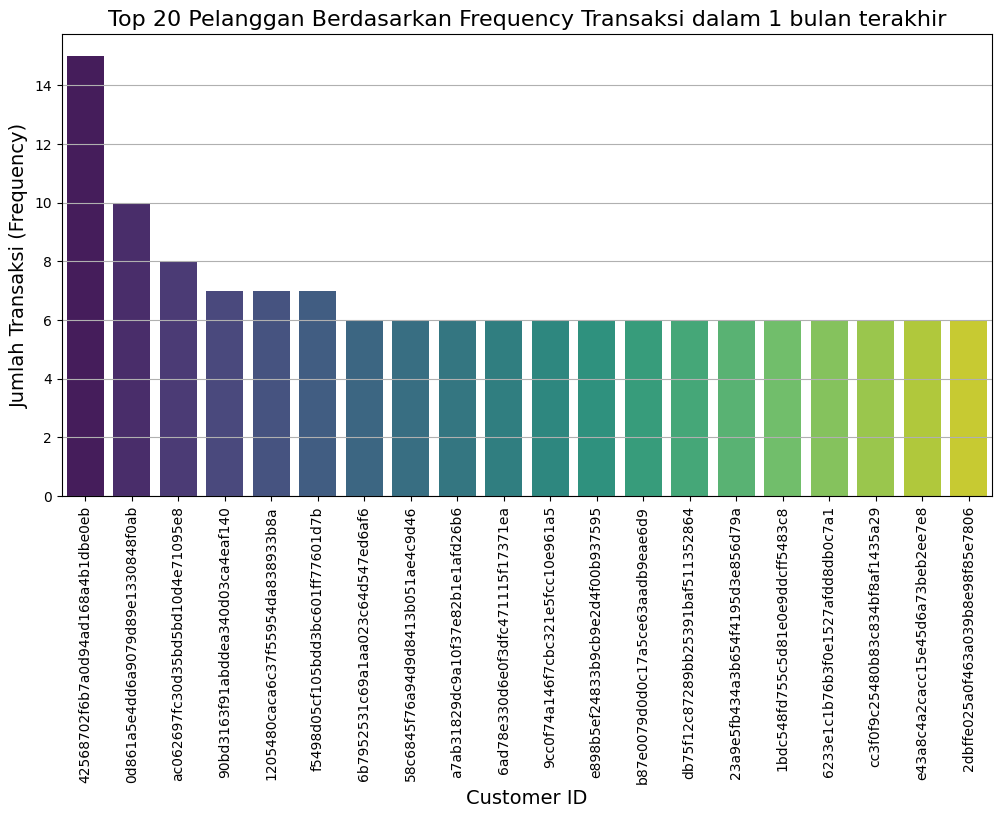

In [74]:
plt.figure(figsize=(12, 6))

sns.barplot(data=frequency_df.sort_values(by='frequency', ascending=False).head(20), 
            x='customer_id', y='frequency', palette='viridis')

plt.title('Top 20 Pelanggan Berdasarkan Frequency Transaksi dalam 1 bulan terakhir', fontsize=16)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Jumlah Transaksi (Frequency)', fontsize=14)

plt.xticks(rotation=90)  # Memutar label sumbu X agar tidak tumpang tindih
plt.grid(axis='y')
plt.show()

In [75]:
monetary_df = all_data.groupby('customer_id').agg({
    'payment_value': 'sum'
}).reset_index()

monetary_df.rename(columns={'payment_value': 'monetary'}, inplace=True)

monetary_df.head()

,customer_id,monetary
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


C:\Users\domin\AppData\Local\Temp\ipykernel_31600\1537987756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monetary_df.sort_values(by='monetary', ascending=False).head(20),


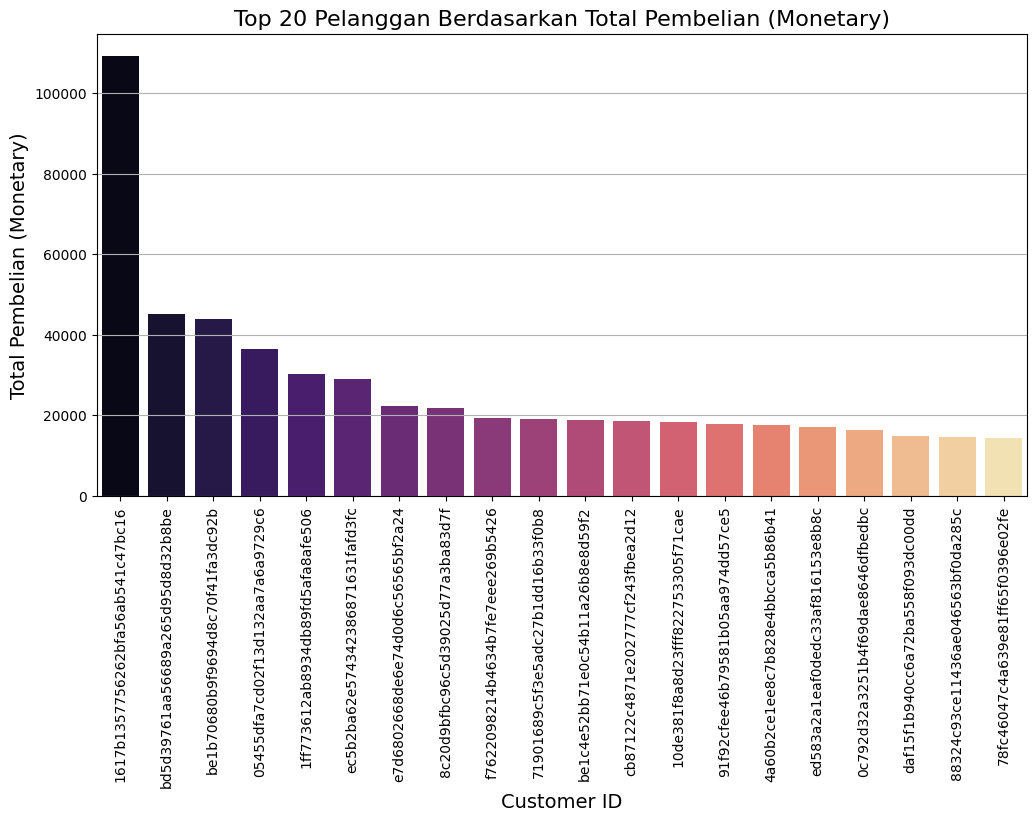

In [76]:
plt.figure(figsize=(12, 6))

sns.barplot(data=monetary_df.sort_values(by='monetary', ascending=False).head(20), 
            x='customer_id', y='monetary', palette='magma')

plt.title('Top 20 Pelanggan Berdasarkan Total Pembelian (Monetary)', fontsize=16)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Total Pembelian (Monetary)', fontsize=14)

plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

## Conclusion

1. Produk apa yang paling laku berdasarkan kategorinya ?

Berdasarkan grafik yang telah dibuat, kategori produk yang paling banyak terjual yaitu bed bath table yang mana ini merupakan keperluan rumah tangga yang tentunya diperlukan oleh banyak orang diikuti dengan produk kecantikan. Hal ini bisa menjadi salah satu peluang untuk menjual produk kosmetik. Sedangkan kategori produk yang paling sedikit terjual yaitu security and service. Hal ini mungkin saja membuktikan bahwa masyarakat setempat belum teredukasi mengenai pentingnya keamanan.

2. Bagaimana persebaran pelanggan yang ada?

Pada grafik yang telah dibuat, terlihat kota sao paulo menjadi kota yang paling banyak memiliki customer, diikuti dengan kota rio de janeiro. Hal ini membuat kota sao paulo menjadi potensi pasar yang sangat baik untuk melakukan penetrasi pasar yang baru.

3. Bagaimana RFM Analysis nya?

Berdasarkan analisis RFM yang telah dilakukan, terlihat analysis recency customer yang cukup banyak melakukan pembelian lebih dari 100 hari sejak pembelian terakhir. Ini berarti banyak pelanggan yang memang berhenti melakukan transaksi lebih dari 3 bulan. Namun pada analysis frequency, terlihat masih ada beberapa user yang masih melakukan transaksi pada satu bulan terakhir dan customer paling banyak melakukan transaksi sebanyak 15 kali. Dan pada analysis monetary, terlihat pada suatu transaksi customer menghabiskan lebih dari 1000000.
